# Day 3

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 붓꽃 데이터
다중 유형 분류

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.data.shape)  
#유형 도수
pd.Series(iris.target).value_counts()

(150, 4)


0    50
1    50
2    50
Name: count, dtype: int64

In [6]:
from sklearn.linear_model import Perceptron

model = Perceptron(max_iter=20, eta0=0.1, shuffle=False)
model.fit(iris.data, iris.target)
accuracy = model.score(iris.data, iris.target)
print(f'정확도: {accuracy:.4f}')

model = Perceptron(max_iter=20, eta0=0.1, shuffle=True, random_state=3)
model.fit(iris.data, iris.target)
accuracy = model.score(iris.data, iris.target)
print(f'정확도: {accuracy:.4f}')

pd.DataFrame(model.coef_, columns=iris.feature_names, index=iris.target_names).assign(절편=model.intercept_).round(2)


정확도: 0.6667
정확도: 0.9667


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),절편
setosa,0.19,0.53,-0.88,-0.43,0.1
versicolor,1.44,-2.81,0.62,-2.44,1.1
virginica,-3.10,-2.99,5.02,4.42,-1.9


In [7]:
# 계속

# 직접 출력해보기
W = model.coef_
b = model.intercept_
outputs = iris.data @ W.T + b
예측 = np.argmax(outputs, axis=1)
assert np.all(예측 == model.predict(iris.data))
print(f'정확도: {(예측 == iris.target).mean():.4f}')
pd.DataFrame(outputs, columns=iris.target_names).assign(예측=예측, 정답=iris.target).sample(10).round(2)

정확도: 0.9667


,setosa,versicolor,virginica,예측,정답
60,-1.40,2.41,-1.39,1,1
3,1.21,-0.54,-17.02,0,0
34,1.27,-0.11,-17.94,0,0
53,-1.72,1.87,-0.00,1,1
32,1.90,-2.25,-22.31,0,0
134,-2.89,2.63,5.72,2,2
123,-2.36,1.23,3.05,2,2
59,-1.52,0.00,-0.33,1,1
65,-1.46,1.35,-3.66,1,1
144,-2.97,-1.09,7.13,2,2


In [8]:
# 데이터프레임 사용 예시 (행렬 곱)

A = np.arange(1, 5).reshape(2, 2)
B = np.arange(5, 9).reshape(2, 2)
C = A * B  # 요소별 곱셈
D = A @ B  # 행렬 곱셈

# 행렬곱(수동)
result = []
for 행 in A:
    for 열 in B.T:
        result.append(np.sum(행 * 열))
results = np.array(result).reshape(2, 2)
assert np.all(results == D) and np.all(np.dot(A, B) == D)

frame = pd.concat([pd.DataFrame(A), pd.DataFrame(B), pd.DataFrame(C), pd.DataFrame(D)], axis=1)  # 열 방향 연결
frame.columns = pd.MultiIndex.from_product([['A', 'B', 'C', 'D'], ['0', '1']])
frame

A     B      C       D    
   0  1  0  1   0   1   0   1
0  1  2  5  6   5  12  19  22
1  3  4  7  8  21  32  43  50

## 신경망 순전파

In [9]:
random = np.random.default_rng(3)
xi = np.array([0.1, 0.2])

#layer 1
W1 = random.normal(size=(2, 3)) # 입력 2, 출력 3
b1 = random.normal(size=3) # 출력 3
#layer 2
W2 = random.normal(size=(3, 2)) # 입력 3, 출력 2
b2 = random.normal(size=2) # 출력 2
#layer 3
W3 = random.normal(size=(2, 1)) # 입력 2, 출력 1
b3 = random.normal(size=1) # 출력 1

z1 = xi @ W1 + b1
z2 = z1 @ W2 + b2
z3 = z2 @ W3 + b3

print(f'z1: {z1.round(2)}')
print(f'z2: {z2.round(2)}')
print(f'z3: {z3.round(2)}')


z1: [-1.93 -0.58 -0.87]
z2: [-6.02  1.12]
z3: [2.31]


In [10]:
class 다중퍼셉트론:
    def __init__(self, 입력수, 출력수, 활성화=None, seed=None):
        random = np.random.default_rng(seed)
        self.W = np.random.normal(size=(입력수, 출력수))
        self.b = np.zeros(출력수, dtype=np.float32)
        self.활성화 = 활성화
    def __call__(self, x):
        z = x @ self.W + self.b
        if self.활성화 is not None:
            z = self.활성화(z)
        return z
     

class 신경망:
    def __init__(self):
        self.layers = []
    def add(self, layer):
        self.layers.append(layer)
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x) # 
        return x        

layer1 = 다중퍼셉트론(2, 3)
layer2 = 다중퍼셉트론(3, 2)
layer3 = 다중퍼셉트론(2, 1)

# 신경망 순전파
outputs = layer3(layer2(layer1(xi)))
print(f'outputs: {outputs.round(2)}')

# 신경망 생성
model = 신경망()
model.add(layer1)
model.add(layer2)
model.add(layer3)

assert np.all(outputs == model(xi))


outputs: [-0.02]


In [11]:
import torch
import torch.nn as nn # neural network

X = torch.tensor([[0.1, 0.2]])
print(X.shape)

layer1 = nn.Linear(2, 3) # 입력 2, 출력 3
assert torch.allclose(layer1(X), X @ layer1.weight.T + layer1.bias)

layer2 = nn.Linear(3, 2) # 입력 3, 출력 2
layer3 = nn.Linear(2, 1) # 입력 2, 출력 1

outputs = layer3(layer2(layer1(X)))

model = nn.Sequential(layer1, layer2, layer3)
assert torch.allclose(outputs, model(X))

print(model(X).detach().numpy().round(2))


torch.Size([1, 2])
[[-0.26]]


## 활성화

- 은닉층: 비선형 변환
- 출력층 
    1. 회귀: 항등함수(활성화 없음)
    2. 분류
        1. 이진 분류: sigmode
        2. 다중 분류: softmax

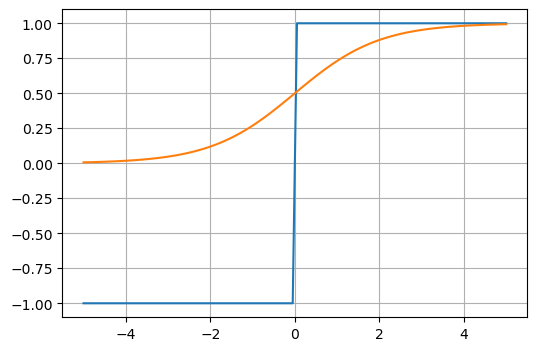

In [12]:
step = lambda x : np.where(x >= 0, 1, -1)
sigmoid = lambda x : 1 / (1 + np.exp(-x))

xs = np.linspace(-5, 5, 100)

plt.figure(figsize=(6, 4))
plt.plot(xs, step(xs), label='step', color='C0')
plt.plot(xs, sigmoid(xs), label='sigmoid', color='C1')
plt.grid()
plt.show()

## 로지스틱 시그모이드

분류를 위한 확률 모델링 과정에서 개발 (1958)

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.data.shape)
pd.Series(cancer.target).value_counts().rename({0:'악성', 1:'양성'})
display(pd.DataFrame(cancer.data, columns=cancer.feature_names).head())

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.preprocessing import StandardScaler

scores = {}
model_1 = Perceptron(max_iter=100, eta0=0.1, shuffle=True, random_state=3)
model_1.fit(cancer.data, cancer.target)
scores['Perceptron'] = model_1.score(cancer.data, cancer.target)

scaler = StandardScaler() 
scaled_data = scaler.fit_transform(cancer.data) # 스케일 변환을 위해 정규화
# 데이터를 특성별로 표준화: 평균 0, 표준편차 1
assert np.allclose(scaled_data.mean(axis=0), 0) and np.allclose(scaled_data.std(axis=0), 1)
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(scaled_data, cancer.target)
scores['LogisticRegression'] = model_2.score(scaled_data, cancer.target)

print(pd.Series(scores).round(3))

sample = pd.DataFrame(cancer.data).sample(5)
# display(sample.round(3))

sample_scaled = scaler.transform(sample)
pred_1 = model_1.predict(sample)
pred_2 = model_2.predict(sample_scaled)
예측확률 = model_2.predict_proba(sample_scaled).round(3)
예측확률 = [f'악성:{prob[0]}, 양성:{prob[1]}' for prob in 예측확률]
정답 = cancer.target[sample.index]

pd.DataFrame({'Perceptron': pred_1, 'LogisticRegression': pred_2, '예측확률' : 예측확률, '정답': 정답}).reset_index(drop=True)



Perceptron            0.912
LogisticRegression    0.988
dtype: float64


,Perceptron,LogisticRegression,예측확률,정답
0,1,1,"악성:0.097, 양성:0.903",1
1,1,1,"악성:0.0, 양성:1.0",1
2,1,1,"악성:0.001, 양성:0.999",1
3,0,0,"악성:1.0, 양성:0.0",0
4,1,1,"악성:0.0, 양성:1.0",1


In [15]:
W = model_2.coef_
b = model_2.intercept_
outputs = scaled_data @ W.T + b

p1 = sigmoid(outputs)
p0 = 1 - p1
예측확률 = np.hstack([p0, p1])
assert np.allclose(예측확률, model_2.predict_proba(scaled_data))

pd.DataFrame(예측확률, columns=['악성확률', '양성확률']).sample(5).round(3)

,악성확률,양성확률
164,1.000,0.000
47,0.994,0.006
262,0.998,0.002
54,0.956,0.044
326,0.001,0.999


## 승산률

odd ratio

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
승리확률,0.0,0.01,0.020,0.030,0.040,0.051,0.061,0.071,0.081,0.091,...,0.909,0.919,0.929,0.939,0.949,0.96,0.97,0.98,0.990,1.000
승산률,0.0,0.01,0.021,0.031,0.042,0.053,0.065,0.076,0.088,0.100,...,10.000,11.375,13.143,15.500,18.800,23.75,32.00,48.50,97.999,9999999.005


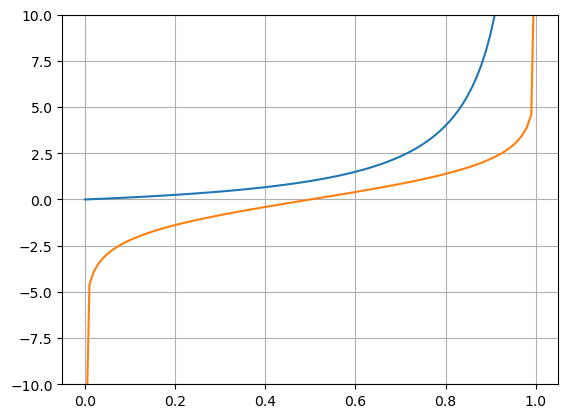

In [16]:
승산률 = lambda 승리확률 : 승리확률 / (1 - 승리확률)

승리확률 = np.linspace(0, 1.0- 1e-7, 100)

display(pd.DataFrame({
    '승리확률': 승리확률,
    '승산률': 승산률(승리확률)
}).round(3).T)

plt.plot(승리확률, 승산률(승리확률)) # 승산률: odds > 0
plt.plot(승리확률, np.log(승산률(승리확률) + 1e-7)) # -inf < log(승산률) < inf
plt.ylim(-10, 10)
plt.grid()



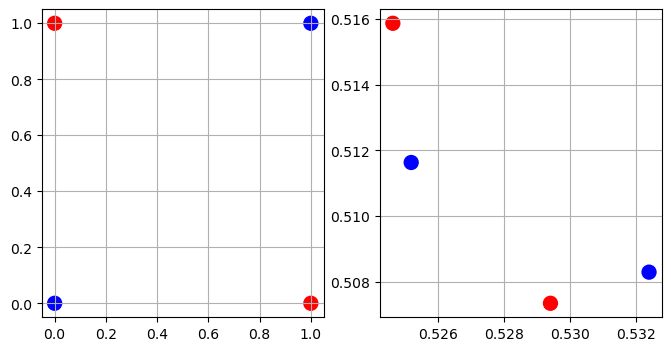

In [ ]:
Xs = np.array([(0, 0), (0, 1), (1, 0), (1, 1)])
y_xor = np.array([0, 1, 1, 0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_xor, s=100, cmap='bwr')
plt.grid()
plt.subplot(1, 2, 2)
for _ in range(3):
    Xs = 다중퍼셉트론(2, 2, 활성화=sigmoid, seed = 1)(Xs) # W가 랜덤이므로, XOR을 분류할 수 없음. 
plt.scatter(Xs[:, 0], Xs[:, 1], c=y_xor, s=100, cmap='bwr')
plt.grid()
plt.show()


## MNIST

In [87]:
from torchvision.datasets import MNIST

mnist = {}
mnist['train'] = MNIST(root='~/data', train=True, download=True) # ~/의 의미 : 홈 디렉토리 (바인드 되어 있는 이 컴퓨터 디렉토리가 아님.)
mnist['test'] = MNIST(root='~/data', train=False, download=True)

print(mnist['train'].data.shape, mnist['test'].data.shape)
# train 데이터는 60000개, test 데이터는 10000개
# 28x28 픽셀 이미지
# 출력 유형은 0~9 사이의 숫자

pd.DataFrame({
    'train' : pd.Series(mnist['train'].targets).value_counts(),
    'test' : pd.Series(mnist['test'].targets).value_counts()
}).T.sort_index()

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])


,0,1,2,3,4,5,6,7,8,9
test,980,1135,1032,1010,982,892,958,1028,974,1009
train,5923,6742,5958,6131,5842,5421,5918,6265,5851,5949


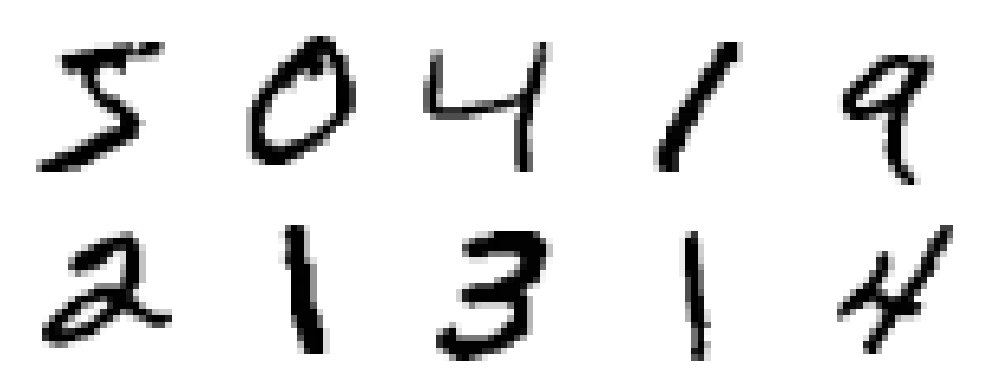

In [88]:
samples = mnist['train'].data[:10]

그림틀, 영역 = plt.subplots(2, 5, figsize=(10, 4))
for sample, 그래프 in zip(samples, 영역.flatten()):
    그래프.imshow(sample, cmap='gray_r')
    그래프.axis('off')
plt.tight_layout()
plt.show()



In [89]:
from sklearn.linear_model import LogisticRegression

train_data = mnist['train'].data.numpy()
print(train_data.shape)
# (S, 28, 28) -> (S, 28*28)
train_data = train_data.reshape(-1, 28*28)
print(train_data.shape)
# 픽셀값 0~255 -> 0~1
train_data = train_data / 255.0
print(f'{train_data.dtype}, {train_data.min()}, {train_data.max()}')

def 전처리(samples):
    X = samples.reshape(-1, 28*28) / 255.0
    return X.astype(np.float32)

model = LogisticRegression(max_iter=1000)
model.fit(train_data, mnist['train'].targets)

test_data = 전처리(mnist['test'].data.numpy())
test_targets = mnist['test'].targets.numpy()

scores = {
    'train' : model.score(train_data, mnist['train'].targets),    
    'test' : model.score(test_data, test_targets)
}
display(pd.Series(scores).round(3))

(60000, 28, 28)
(60000, 784)
float64, 0.0, 1.0


train    0.939
test     0.926
dtype: float64

In [65]:
z = np.array([
    [4.3, 3.2, -2.1], 
    [3.3, 1.2, -7.1]])

# print(np.exp(z).round(3)) # 무조건 양수
# print(np.exp(z) / np.sum(np.exp(z))) # 합이 1이 되도록 정규화

def softmax(x):
    exp_x = np.exp(x-x.max(axis=1, keepdims=True )) # 오버플로우 방지
    return exp_x / exp_x.sum(axis=1, keepdims=True)

pd.DataFrame({
    'z' : z.flatten(),
    'exp(z)' : np.exp(z).flatten(),
    'softmax(z)' : softmax(z).flatten()
}).round(3)


,z,exp(z),softmax(z)
0,4.3,73.700,0.749
1,3.2,24.533,0.249
2,-2.1,0.122,0.001
3,3.3,27.113,0.891
4,1.2,3.320,0.109
5,-7.1,0.001,0.000


In [71]:
outputs = test_data @ model.coef_.T + model.intercept_
예측 = np.argmax(outputs, axis=1)
assert np.all(예측 == model.predict(test_data))
pd.DataFrame(outputs).assign(예측=np.argmax(outputs, axis=1), 정답=test_targets).sample(10)

# 아래 코드는 크게 의미가 없는 코드임.
pd.DataFrame(sigmoid(outputs)).assign(예측=np.argmax(outputs, axis=1), 정답=test_targets).sample(10) 

# def softmax(x):
#     return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
pd.DataFrame(softmax(outputs)).assign(예측=np.argmax(outputs, axis=1), 정답=test_targets).sample(10).round(3)







,0,1,2,3,4,5,6,7,8,9,예측,정답
4362,0.000,0.0,0.012,0.007,0.000,0.007,0.000,0.000,0.974,0.000,8,8
8387,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.985,0.000,0.015,7,7
4587,0.000,0.0,0.005,0.000,0.000,0.000,0.995,0.000,0.000,0.000,6,6
9890,0.004,0.0,0.000,0.000,0.392,0.001,0.001,0.030,0.051,0.521,9,9
7346,0.000,0.0,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,6,6
5658,0.000,0.0,0.000,0.000,0.000,0.999,0.000,0.000,0.000,0.000,5,5
7775,0.000,0.0,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,4,4
7338,0.000,0.0,0.000,0.000,0.057,0.000,0.000,0.000,0.340,0.602,9,4
5633,0.031,0.0,0.007,0.000,0.000,0.931,0.001,0.000,0.030,0.000,5,5
3171,0.001,0.0,0.005,0.054,0.000,0.773,0.001,0.000,0.158,0.008,5,5


(-0.5, 27.5, 27.5, -0.5)

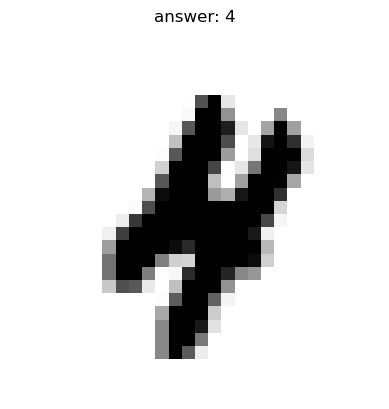

In [79]:
# 샘플 번호로 이미지 직접 확인
sample_index = 7338
plt.imshow(mnist['test'].data[sample_index], cmap='gray_r')
plt.title(f'answer: {mnist["test"].targets[sample_index]}')
plt.axis('off')




이진 분류에서는 소프트맥스보다는 시그모이드로 처리하는 것이 바람직하다.

In [84]:
z1 = np.array([[4.3, 1.2]])  # 처음부터 2D 배열로 만들기

pd.DataFrame({
    'logit' : z1.flatten(),
    'sigmoid(z1)' : sigmoid(z1).flatten(),
    'softmax(z1)' : softmax(z1).flatten()
}).round(3)

,logit,sigmoid(z1),softmax(z1)
0,4.3,0.987,0.957
1,1.2,0.769,0.043


In [ ]:
model = 신경망()
# 은닉층
model.add(다중퍼셉트론(28*28, 50, 활성화=sigmoid))
model.add(다중퍼셉트론(50, 100, 활성화=sigmoid))
#출력층
model.add(다중퍼셉트론(100, 10, 활성화=softmax))

test_data = 전처리(mnist['test'].data.numpy())
test_target = mnist['test'].targets.numpy()

outputs = model(test_data)
print(outputs.shape)

예측 = np.argmax(outputs, axis=1)
print(f'정확도: {(예측 == test_target).mean():.4f}')

# 이건 학습한 것이 아니어서 정확도가 의미가 없다. 다중퍼셉트론 -> 순전파 -> (랜덤 W, b 이므로)





(10000, 10)
정확도: 0.0991


In [99]:
# 기 학습된 매개변수를 파일로부터 불러오기

params = np.load('mnist_weight.pkl', allow_pickle=True)

for (W, b), layer in zip(params, model.layers):
    print(W.shape, b.shape)
    # 모형의 계층 매개변수와 형태가 일치하는지 확인
    assert W.shape == layer.W.shape and b.shape == layer.b.shape
    # 매개변수 할당
    layer.W = W
    layer.b = b

outputs = model(test_data)
예측 = np.argmax(outputs, axis=1)
print(f'정확도: {(예측 == test_target).mean():.2%}')


(784, 50) (50,)
(50, 100) (100,)
(100, 10) (10,)
정확도: 93.52%


In [37]:
# cursor가 구현한 코드.
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# 데이터 로드
train_dataset = MNIST(root='~/data', train=True, download=False, transform=ToTensor())
test_dataset = MNIST(root='~/data', train=False, download=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# 모델
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 10)
).to(device)

# 학습
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5):
    model.train()
    for images, labels in train_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# 평가
scores = {}
model.eval()
with torch.no_grad():
    for dataset_name, loader in [('train', train_loader), ('test', test_loader)]:
        correct = 0
        for images, labels in loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            pred = torch.argmax(outputs, dim=1)
            correct += (pred == labels).sum().item()
        scores[dataset_name] = correct / len(loader.dataset)

pd.Series(scores).round(3)

cuda


train    0.983
test     0.972
dtype: float64

In [ ]:
# cursor가 구현한 코드.
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# 데이터 로드
train_dataset = MNIST(root='~/data', train=True, download=False, transform=ToTensor())
test_dataset = MNIST(root='~/data', train=False, download=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128)

# 모델 (더 깊고 효과적)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = nn.Sequential(
    nn.Linear(28*28, 256),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 10)
).to(device)

# 학습
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

best_accuracy = 0
for epoch in range(15):
    model.train()
    for images, labels in train_loader:
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # 평가
    model.eval()
    with torch.no_grad():
        correct = 0
        for images, labels in test_loader:
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            pred = torch.argmax(outputs, dim=1)
            correct += (pred == labels).sum().item()
        accuracy = correct / len(test_dataset)
        best_accuracy = max(best_accuracy, accuracy)
    
    scheduler.step()

print(f'최종 정확도: {best_accuracy:.2%}')

최종 정확도: 98.39%
